# Classifing breast cancer using Machine Learning

In this tutorial, we'll use SVM and other tools to classify cancer diagnosis from patients. We'll be using the (Sklearn breast cancer dataset)[https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html]

We first set up our workspace

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



```
# This is formatted as code
```

bold text## Importing and Preprocessing the dataset

Let's have a closer look at the data to get a rough idea of what we're dealing with.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

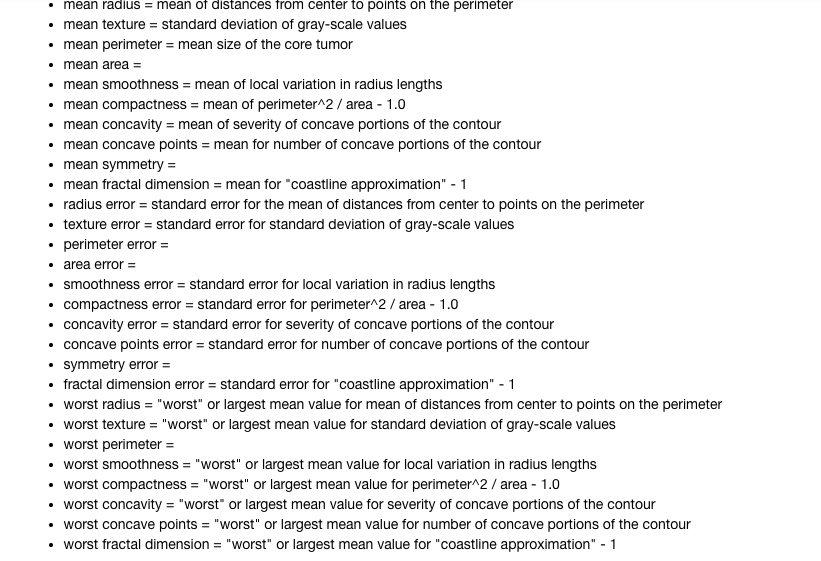

Let's perform some more visualisations...

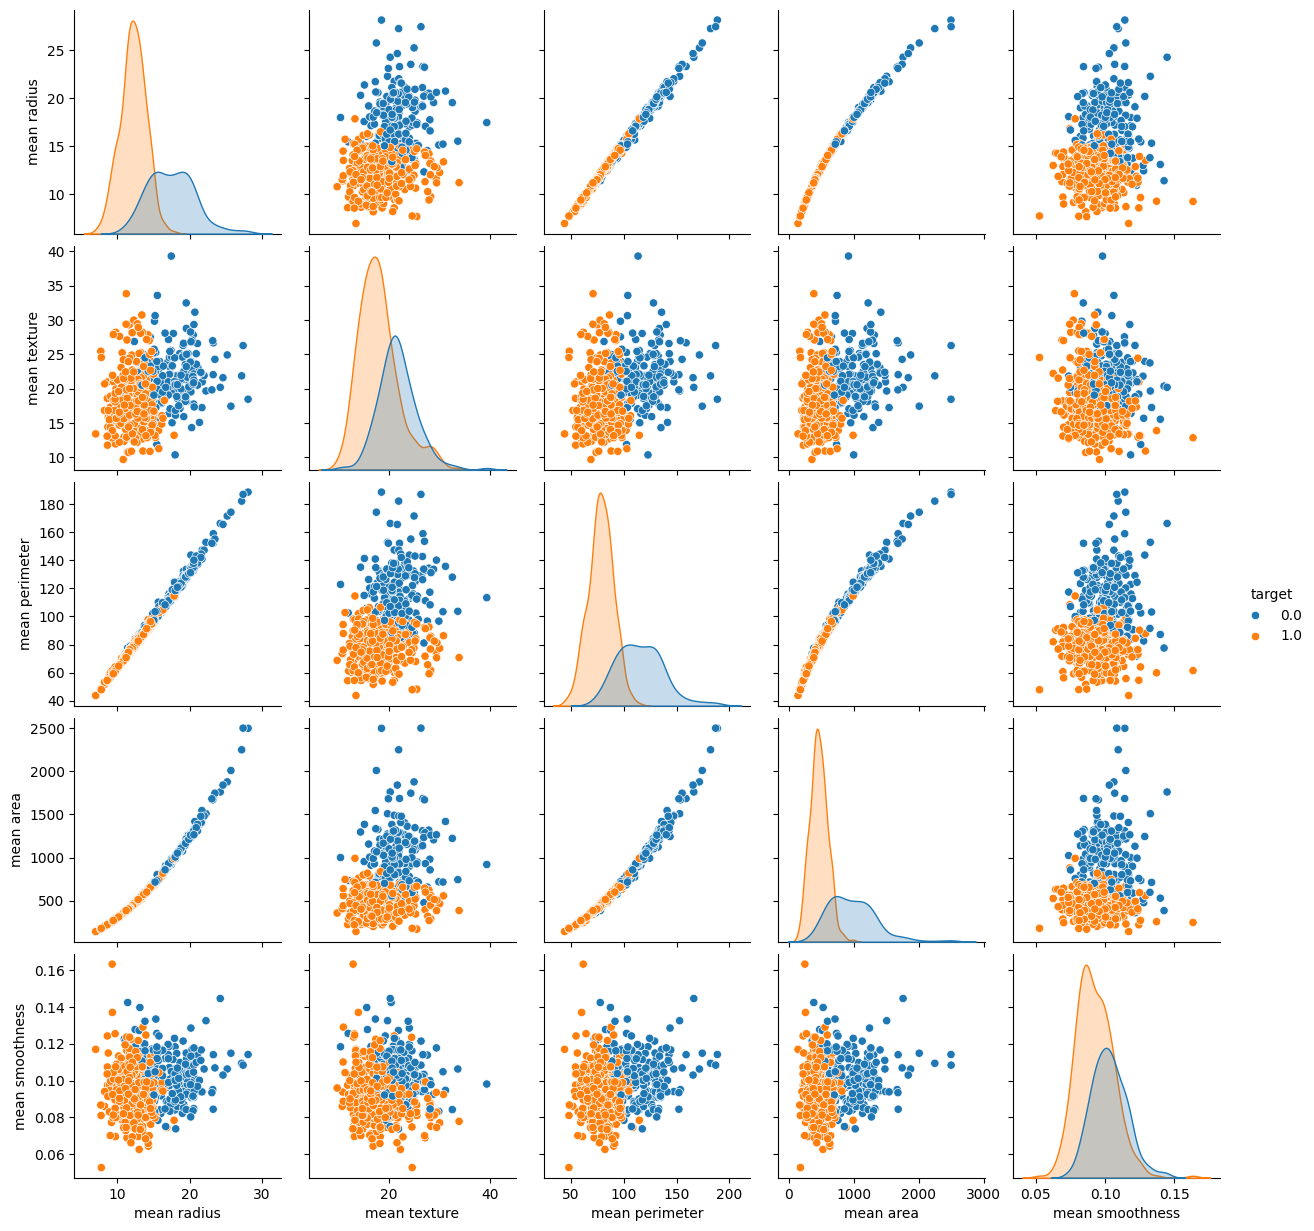

In [3]:
sns.pairplot(df_cancer, hue= 'target', vars = [ 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness' ])

<Axes: >

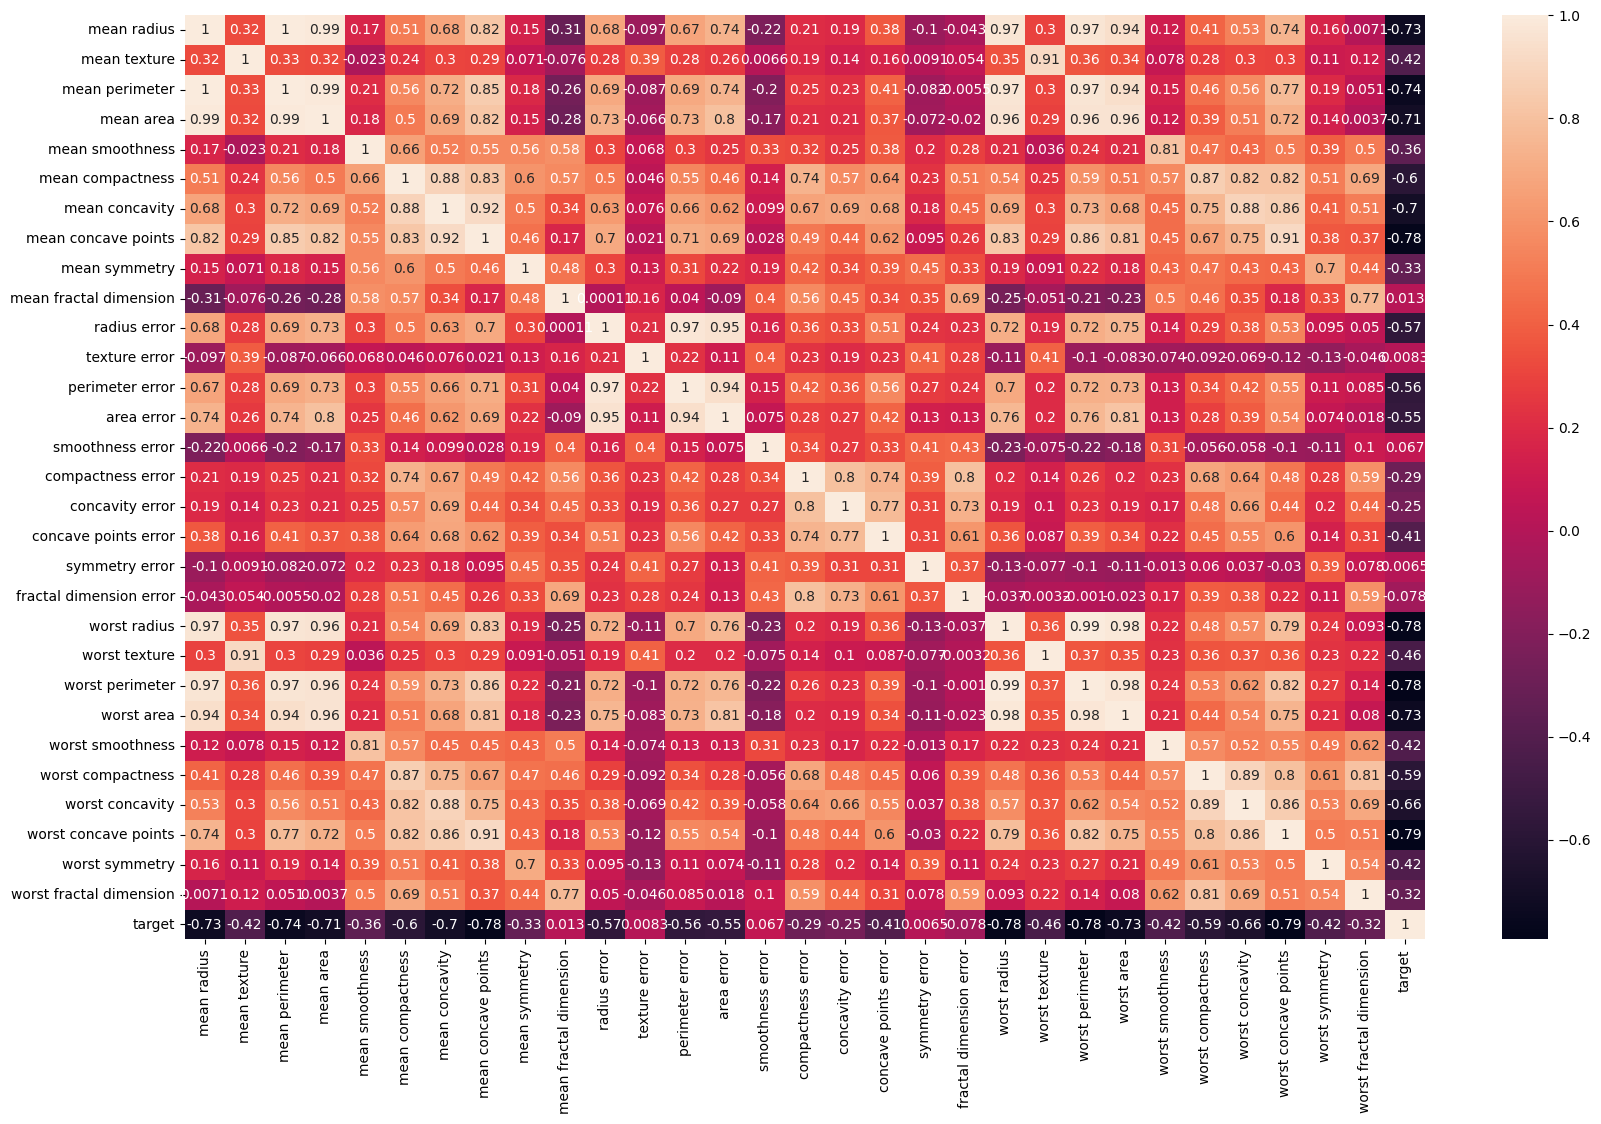

In [4]:
plt.figure(figsize=[20,12])
sns.heatmap(df_cancer.corr(), annot=True)

## Preparing the feature set

In [5]:
X = df_cancer.drop(['target'], axis = 1)
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

## Preparing the target set

In [6]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

## Prepating the training and testing data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


# SVM

## Configuring the *SVM*

In [8]:
from sklearn.svm import SVC
model = SVC() # Check https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html for paramters

# Training the SVM

In [9]:
model.fit(X_train, y_train)

SVC()

## Getting some *predictions*

In [10]:
y_predict = model.predict(X_test)

## Confusion matrix

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(y_test, y_predict, labels = [1,0]))

confusion = pd.DataFrame(cm, index = ['is_cancer', 'is_healthy'], columns = [ 'predicted_cancer', 'predicted_healthy' ])
confusion

predicted_cancer  predicted_healthy
is_cancer                 66                  0
is_healthy                 8                 40

<Axes: >

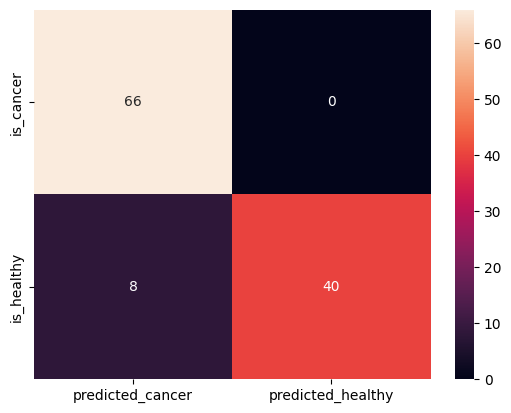

In [12]:
sns.heatmap(confusion, annot=True)

In [13]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        48
         1.0       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



## Improving the model

### Scaling the dataset

Try to scale the dataset using `X' = (X-X_min) / (X_max - X_min)`

In [14]:
# Scale the dataset

# Re-make training and testing datasets

# Initialise and fit the model

# Obtain prediction

# Display classification performance

# Other improvements

Feel free to have a look at the [Sklearn SVC page](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and test the various parameters of SVMs.

# Using other classifiers

There is a plethora of alternative classifiers in Sklearn: [check them out](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)